# Regression - Bike Shop Data

Predict how many bike rentals happen for a day (cnt). Please use the following data and respond to the questions below.

This project requires Python 3.7 or above: and Scikit Learn

In [12]:
import sys
assert sys.version_info >= (3, 7)
import sklearn
assert sklearn.__version__ >= "1.0.1"
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [13]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# EDA

In [14]:
# Read data set
df = pd.read_csv("https://raw.githubusercontent.com/Ph1lippK/VAWI/master/Data/02_Bike%20rental.csv",sep=',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Conditions for a linear regression
1. Y has a linear relationship to X --> Scatterplot
1. For each value of X, the probability distribution of Y has the same standard deviation σ. --> residual plot
1. for any given value of X the Y is indipendent (indicated by random pattern on residual plot
1. for any given value of X the Y values are normaly distributed --> histogram

Dependent variable y is cnt as the count of total rental bikes including both casual and registered (AV)

As for now every other value will be treated as the indipendent variable X


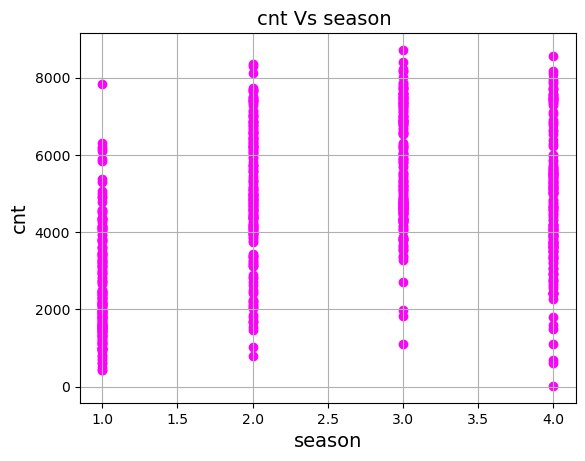

In [35]:
# Scatterplot for linear relationship
plt.scatter(df['season'], df['cnt'], color='magenta')
plt.title('cnt Vs season ', fontsize=14)
plt.xlabel('season', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

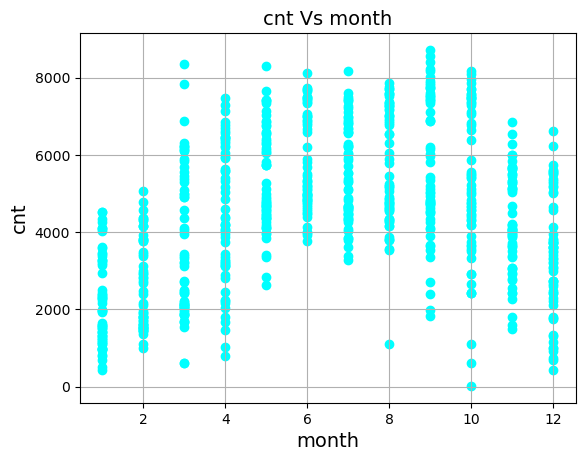

In [30]:
plt.scatter(df['mnth'], df['cnt'], color='cyan')
plt.title('cnt Vs month', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

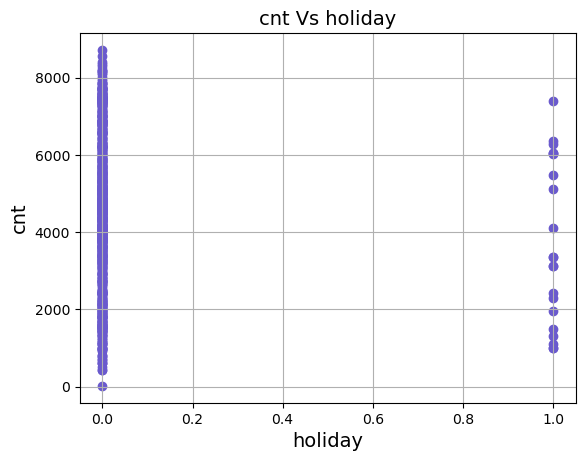

In [42]:
plt.scatter(df['holiday'], df['cnt'], color='slateblue')
plt.title('cnt Vs holiday', fontsize=14)
plt.xlabel('holiday', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

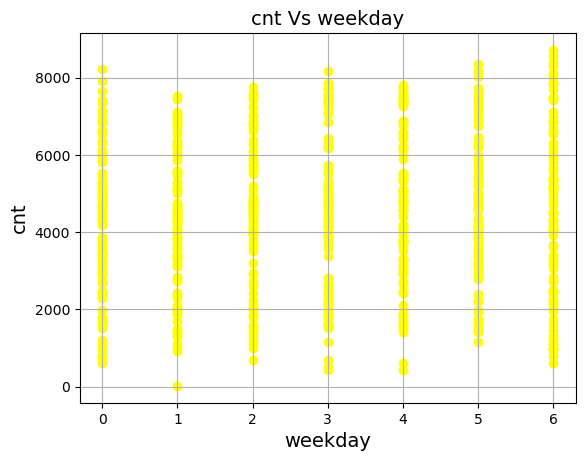

In [468]:
plt.scatter(df['weekday'], df['cnt'], color='yellow')
plt.title('cnt Vs weekday', fontsize=14)
plt.xlabel('weekday', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

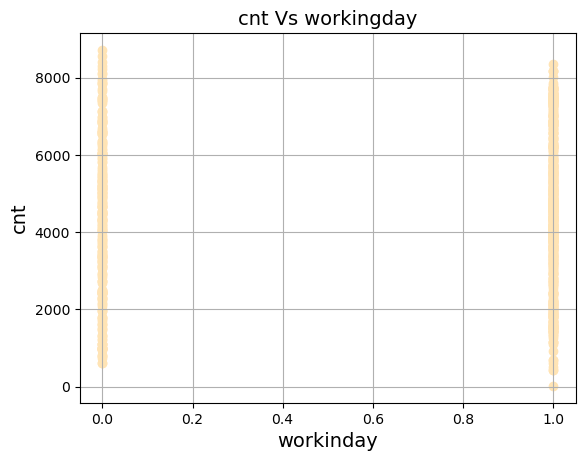

In [39]:
plt.scatter(df['workingday'], df['cnt'], color='moccasin')
plt.title('cnt Vs workingday', fontsize=14)
plt.xlabel('workinday', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

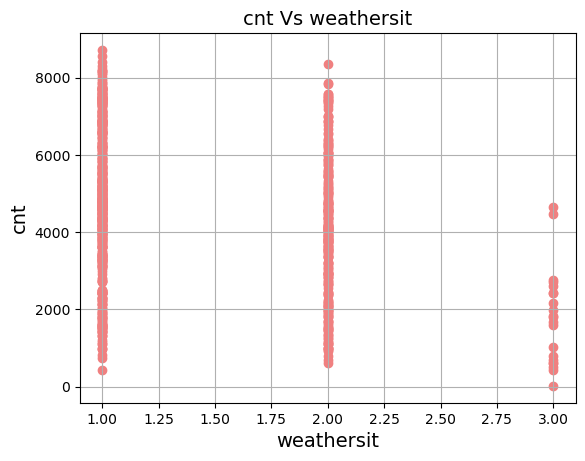

In [40]:
plt.scatter(df['weathersit'], df['cnt'], color='lightcoral')
plt.title('cnt Vs weathersit', fontsize=14)
plt.xlabel('weathersit', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

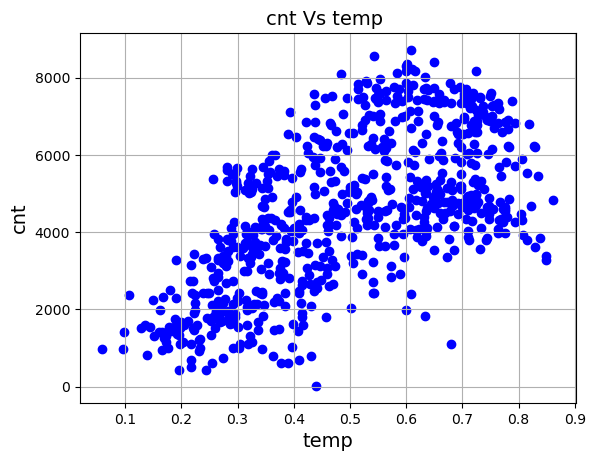

In [15]:
# Scatterplot for linear relationship
plt.scatter(df['temp'], df['cnt'], color='blue')
plt.title('cnt Vs temp ', fontsize=14)
plt.xlabel('temp', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

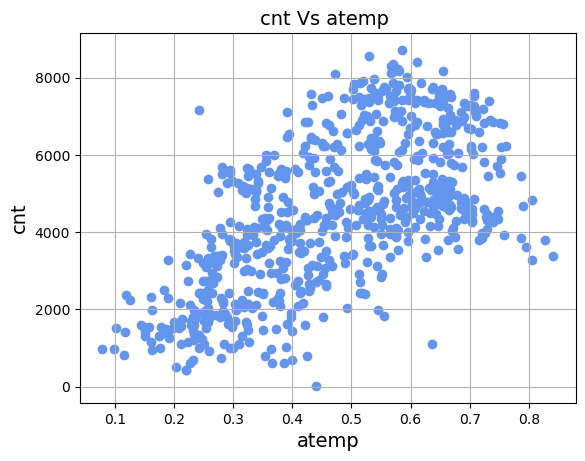

In [31]:
# Scatterplot for linear relationship
plt.scatter(df['atemp'], df['cnt'], color='cornflowerblue')
plt.title('cnt Vs atemp ', fontsize=14)
plt.xlabel('atemp', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

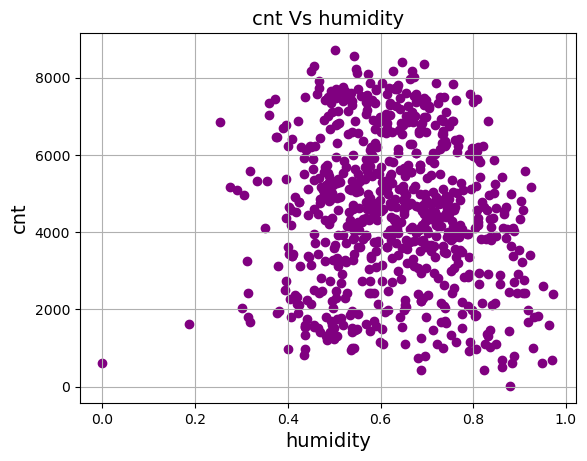

In [466]:
plt.scatter(df['hum'], df['cnt'], color='purple')
plt.title('cnt Vs humidity', fontsize=14)
plt.xlabel('humidity', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

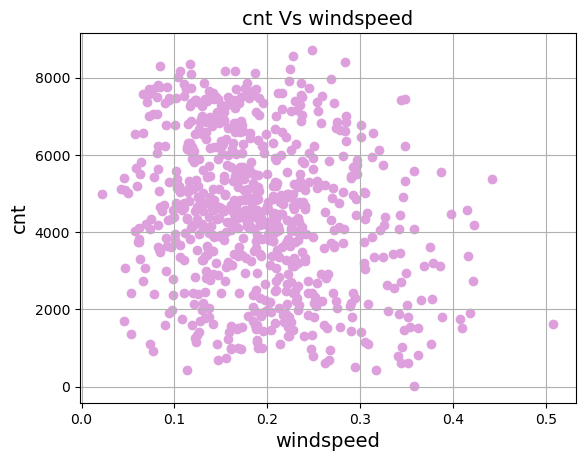

In [41]:
plt.scatter(df['windspeed'], df['cnt'], color='plum')
plt.title('cnt Vs windspeed', fontsize=14)
plt.xlabel('windspeed', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

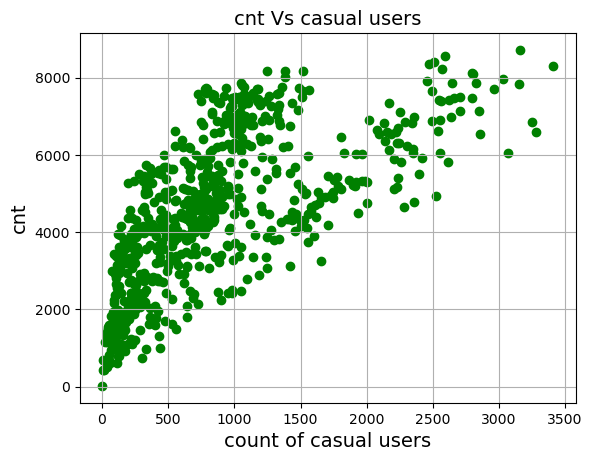

In [33]:
plt.scatter(df['casual'], df['cnt'], color='green')
plt.title('cnt Vs casual users', fontsize=14)
plt.xlabel('count of casual users', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

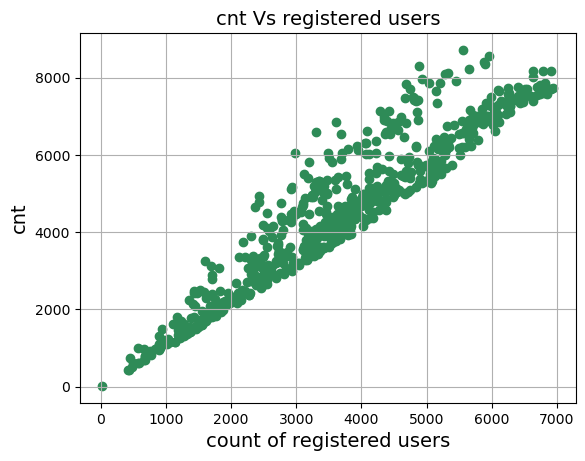

In [32]:
plt.scatter(df['registered'], df['cnt'], color='seagreen')
plt.title('cnt Vs registered users', fontsize=14)
plt.xlabel('count of registered users', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

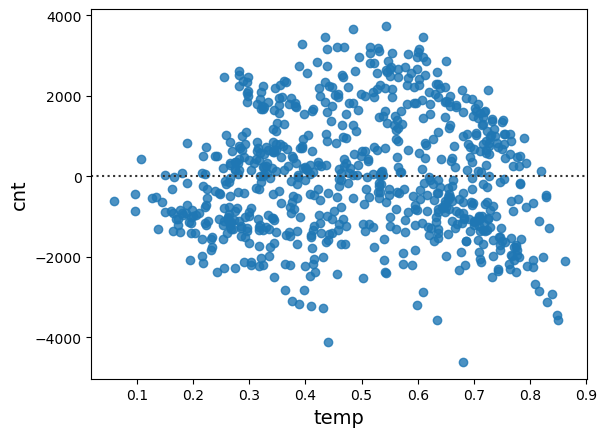

In [27]:
sns.residplot(x='temp', y='cnt', data=df)
  
plt.show()

# Result Linear Relationship

| Feature   | Relationship|  
|----------|:-------------:|
| Season |  n | 
| mnth |    y | 
| holiday | n | 
| weekday | n | 
| workingday | n | 
| weathersit | y | 
| temp | y| 
| atemp | y | 
|hum  | m | 
| windspeed | y| 
| casual | y | 
| registered | y | 


In [7]:
#fit simple linear regression model
model = ols('cnt ~ temp', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           2.81e-81
Time:                        14:34:42   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1214.6421    161.164      7.537      0.0

eval_env: 1


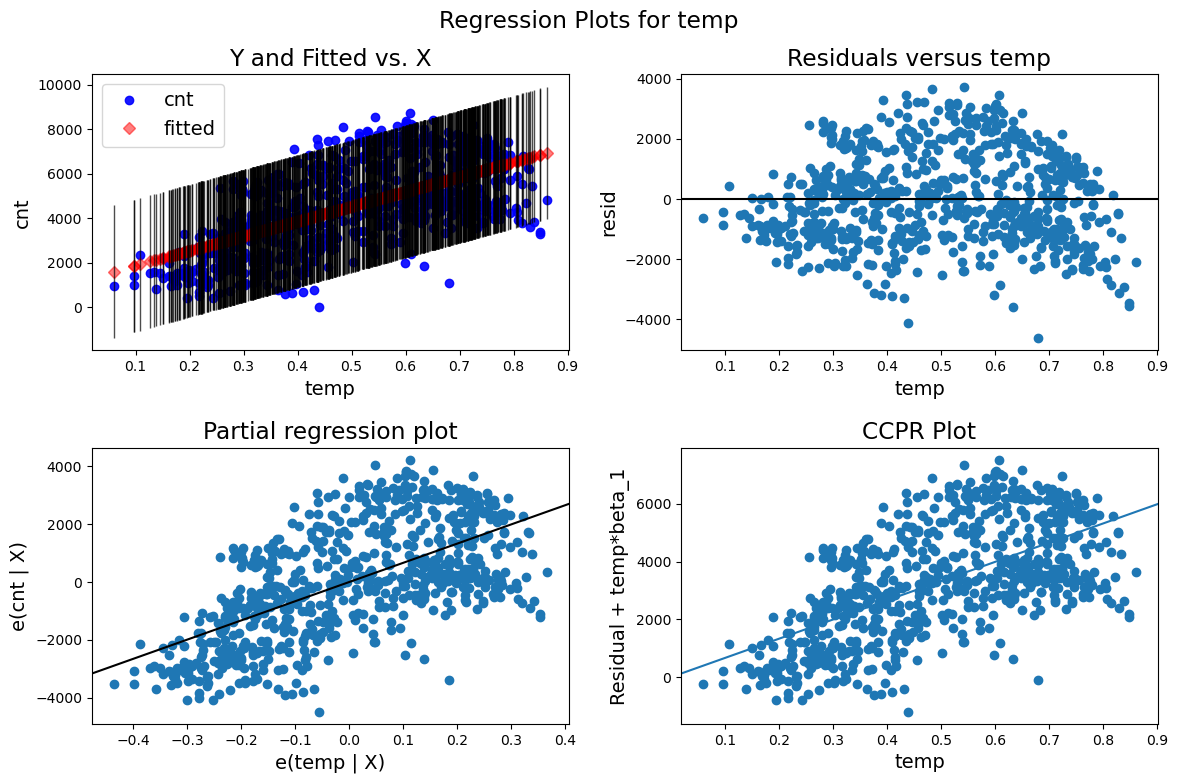

In [8]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'temp', fig=fig)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     258.1
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.89e-85
Time:                        14:54:18   Log-Likelihood:                -6373.8
No. Observations:                 731   AIC:                         1.275e+04
Df Residuals:                     728   BIC:                         1.277e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    841.4101    174.359      4.826      0.0

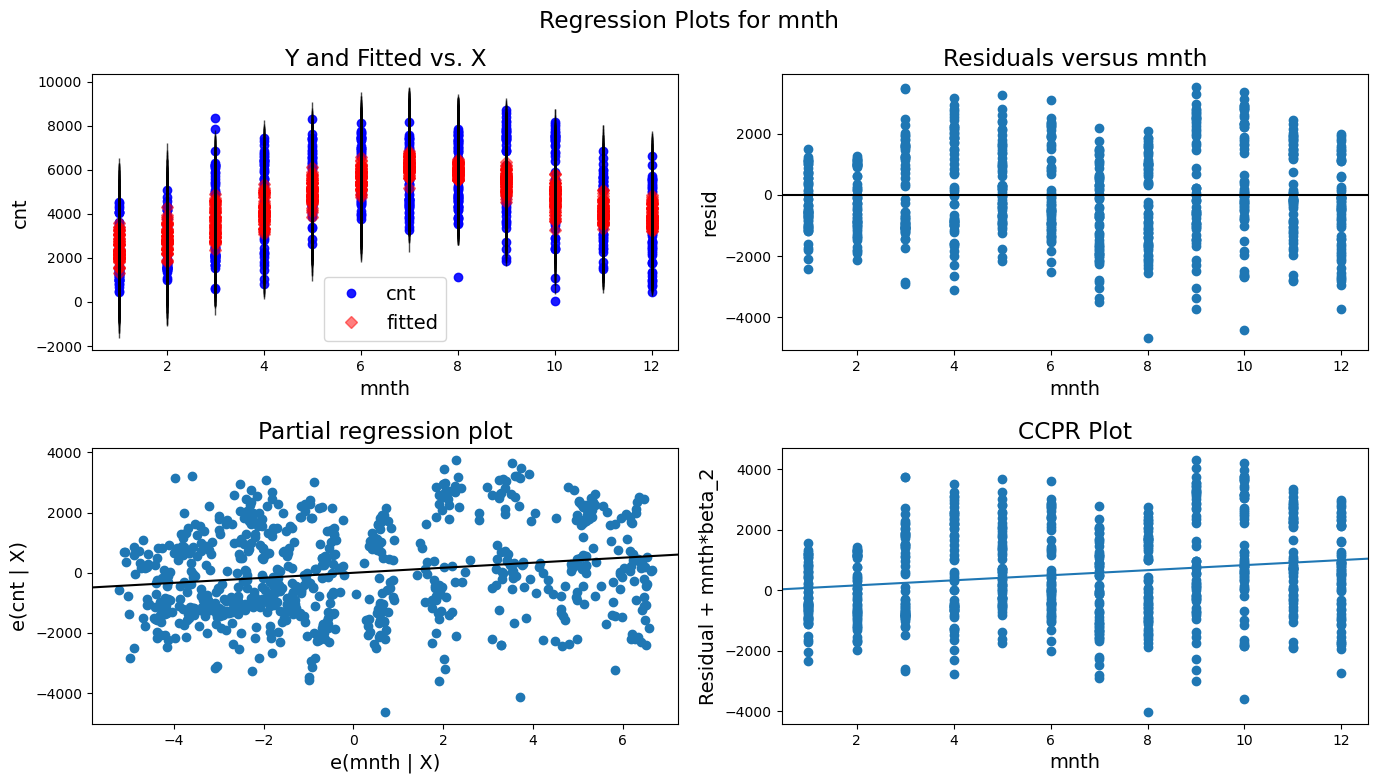

In [28]:
# fit multi linear regression model
multi_model = ols('cnt ~ temp + mnth', data=df).fit()
  
# display model summary
print(multi_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'mnth', fig=fig)

# Multiple Linear Regression with sklearn 

In [43]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [56]:

#X = df[['temp','casual','registered']]#.array.reshape(-1, 1)

#X = df['temp'] #.array.reshape(-1, 1)
#X = pd.DataFrame(df.iloc[:,2:-1]) # drop frist and last row with cnt value
#X = df['temp'].array.reshape(-1, 1)
X = df.drop(columns=['instant','dteday','season','yr','holiday','weekday','workingday','casual','registered','cnt']) #'casual','registered',
#y = df['cnt']
y = pd.DataFrame(df.iloc[:,-1])

In [57]:
X

,mnth,weathersit,temp,atemp,hum,windspeed
0,1,2,0.344167,0.363625,0.805833,0.160446
1,1,2,0.363478,0.353739,0.696087,0.248539
2,1,1,0.196364,0.189405,0.437273,0.248309
3,1,1,0.200000,0.212122,0.590435,0.160296
4,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...
726,12,2,0.254167,0.226642,0.652917,0.350133
727,12,2,0.253333,0.255046,0.590000,0.155471
728,12,2,0.253333,0.242400,0.752917,0.124383
729,12,1,0.255833,0.231700,0.483333,0.350754


In [58]:
X.describe()

,mnth,weathersit,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,6.519836,1.395349,0.495385,0.474354,0.627894,0.190486
std,3.451913,0.544894,0.183051,0.162961,0.142429,0.077498
min,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392
25%,4.000000,1.000000,0.337083,0.337842,0.520000,0.134950
50%,7.000000,1.000000,0.498333,0.486733,0.626667,0.180975
75%,10.000000,2.000000,0.655417,0.608602,0.730209,0.233214
max,12.000000,3.000000,0.861667,0.840896,0.972500,0.507463


In [59]:
y

,cnt
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


# Split datasets


In [60]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train ML Model

In [61]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)

LinearRegression()

# Evaluate ML Model

In [62]:
predictions_train = lin_reg.predict(X_train)
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions_train))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions_train))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, predictions_train)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_train, predictions_train))

Mean Absolute Error(MAE): 1146.9583050249373
Mean Squared Error(MSE): 1866669.4635402788
Root Mean Squared Error(RMSE): 1366.261125678499
R2-Square: 0.49077429285889285


In [ ]:
# plot does only work with 2 variables
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

In [ ]:
# plot does only work with 2 variables
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("temp")
plt.ylabel("cnt")
#plt.axis([0, 2, 0, 15]) [xmin, xmax, ymin, ymax]'
plt.axis([0,1,0,10000])
plt.grid()
plt.legend(loc="upper left")
save_fig("Multiple_regression_bike_rentals")

plt.show()

# Multiple Linear Regression with statsmodel 

## Select & Prepare Data

In [480]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [65]:
#X = df[['temp','casual','registered']]#.array.reshape(-1, 1)

#X = df['temp'] #.array.reshape(-1, 1)
#X = pd.DataFrame(df.iloc[:,2:-1]) # drop frist and last row with cnt value
#X = df['temp'].array.reshape(-1, 1)
X = df.drop(columns=['instant','dteday','season','yr','holiday','weekday','workingday','casual','registered','cnt']) #'casual','registered',
#y = df['cnt']
y = pd.DataFrame(df.iloc[:,-1])

In [66]:
X

,mnth,weathersit,temp,atemp,hum,windspeed
0,1,2,0.344167,0.363625,0.805833,0.160446
1,1,2,0.363478,0.353739,0.696087,0.248539
2,1,1,0.196364,0.189405,0.437273,0.248309
3,1,1,0.200000,0.212122,0.590435,0.160296
4,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...
726,12,2,0.254167,0.226642,0.652917,0.350133
727,12,2,0.253333,0.255046,0.590000,0.155471
728,12,2,0.253333,0.242400,0.752917,0.124383
729,12,1,0.255833,0.231700,0.483333,0.350754


In [67]:
y

,cnt
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


## Split Dataset

In [68]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Train ML Model

In [70]:
# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 


In [71]:
predictions

0      2572.201569
1      2536.332934
2      2511.979851
3      2552.644495
4      2965.399201
          ...     
726    2517.243658
727    3458.155495
728    3122.718621
729    3390.166811
730    3267.943691
Length: 731, dtype: float64

## Evaluate ML Model

In [72]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     120.0
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          5.12e-105
Time:                        15:13:03   Log-Likelihood:                -6317.4
No. Observations:                 731   AIC:                         1.265e+04
Df Residuals:                     724   BIC:                         1.268e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3506.5398    348.257     10.069      0.0

# Lasso Regression 


## Select & Prepare Data

In [86]:
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
#X = df[['temp','casual','registered']]#.array.reshape(-1, 1)

#X = df['temp'] #.array.reshape(-1, 1)
#X = pd.DataFrame(df.iloc[:,2:-1]) # drop frist and last row with cnt value
#X = df['temp'].array.reshape(-1, 1)
X = df.drop(columns=['instant','dteday','season','yr','holiday','weekday','workingday','casual','registered','cnt']) #'casual','registered',
#y = df['cnt']
y = pd.DataFrame(df.iloc[:,-1])

In [87]:
X

,mnth,weathersit,temp,atemp,hum,windspeed
0,1,2,0.344167,0.363625,0.805833,0.160446
1,1,2,0.363478,0.353739,0.696087,0.248539
2,1,1,0.196364,0.189405,0.437273,0.248309
3,1,1,0.200000,0.212122,0.590435,0.160296
4,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...
726,12,2,0.254167,0.226642,0.652917,0.350133
727,12,2,0.253333,0.255046,0.590000,0.155471
728,12,2,0.253333,0.242400,0.752917,0.124383
729,12,1,0.255833,0.231700,0.483333,0.350754


In [88]:
y

,cnt
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


In [ ]:
## Split Dataset